In [1]:
import pandas as pd    
train_csv = pd.read_csv('/content/drive/MyDrive/dataset/train.csv')
test_csv = pd.read_csv('/content/drive/MyDrive/dataset/test.csv')

In [2]:
train_folder = '/content/drive/MyDrive/dataset/train'
test_folder = '/content/drive/MyDrive/dataset/test'

In [3]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
rotation_range=45,
rescale=1./255,
horizontal_flip=True,
validation_split=0.2
)

test_gen = ImageDataGenerator(rescale = 1./255)

In [4]:
train_data=train_gen.flow_from_dataframe(
                dataframe=train_csv,
                directory=train_folder,
                x_col="image_ID",
                y_col="label",
                subset="training",
                batch_size=32,
                seed=42,
                shuffle=True,
                class_mode="categorical",
                target_size=(32,32))
valid_data=train_gen.flow_from_dataframe(
              dataframe=train_csv,
              directory=train_folder,
              x_col="image_ID",
              y_col="label",
              subset="validation",
              batch_size=32,
              seed=42,
              shuffle=True,
              class_mode="categorical",
              target_size=(32,32))

Found 6582 validated image filenames belonging to 7 classes.
Found 1645 validated image filenames belonging to 7 classes.


In [5]:
test_data=test_gen.flow_from_dataframe(
                dataframe=test_csv,
                directory=test_folder,
                x_col='image_ID',
                y_col=None,
                batch_size=32,
                seed=42,
                shuffle=False,
                class_mode=None,
                target_size=(32,32))

Found 2056 validated image filenames.


In [6]:
len(train_data)

206

In [7]:
train_data

In [8]:
imgs,lbl=next(iter(train_data))

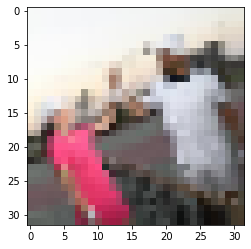

In [9]:
import matplotlib.pyplot as plt
plt.imshow(imgs[30])
plt.show()

In [10]:
lbl[30]

array([0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [11]:
imgs[30].shape

(32, 32, 3)

In [12]:
for i in train_data.class_indices:
  print(i)

Badminton
Cricket
Karate
Soccer
Swimming
Tennis
Wrestling


In [13]:
num_classes=len(train_data.class_indices)

In [14]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape=(32,32,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(num_classes,activation='softmax')
])

In [15]:
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=["accuracy"])      

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [17]:
model.fit(train_data,
          validation_data=valid_data,
          epochs=10
)

Epoch 1/10
206/206 [==============================] - 2670s 13s/step - loss: 1.6529 - accuracy: 0.3464 - val_loss: 1.3669 - val_accuracy: 0.4681
Epoch 2/10
206/206 [==============================] - 65s 314ms/step - loss: 1.2887 - accuracy: 0.5213 - val_loss: 1.2281 - val_accuracy: 0.5465
Epoch 3/10
206/206 [==============================] - 64s 312ms/step - loss: 1.1472 - accuracy: 0.5782 - val_loss: 1.0501 - val_accuracy: 0.6097
Epoch 4/10
206/206 [==============================] - 65s 313ms/step - loss: 1.0881 - accuracy: 0.6086 - val_loss: 0.9836 - val_accuracy: 0.6371
Epoch 5/10
206/206 [==============================] - 65s 314ms/step - loss: 1.0058 - accuracy: 0.6285 - val_loss: 0.9574 - val_accuracy: 0.6438
Epoch 6/10
206/206 [==============================] - 64s 313ms/step - loss: 0.9876 - accuracy: 0.6466 - val_loss: 0.9843 - val_accuracy: 0.6365
Epoch 7/10
206/206 [==============================] - 64s 311ms/step - loss: 0.9579 - accuracy: 0.6577 - val_loss: 0.9659 - val_ac

In [ ]:
pred=model.predict(test_data)

In [ ]:
pred[:5]

In [18]:
class_names=[]
for i in train_data.class_indices:
  class_names.append(i)
print(class_names)

['Badminton', 'Cricket', 'Karate', 'Soccer', 'Swimming', 'Tennis', 'Wrestling']


In [19]:
!wget https://upload.wikimedia.org/wikipedia/commons/6/69/Muralitharan_bowling_to_Adam_Gilchrist.jpg

--2022-04-22 17:16:46--  https://upload.wikimedia.org/wikipedia/commons/6/69/Muralitharan_bowling_to_Adam_Gilchrist.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 628522 (614K) [image/jpeg]
Saving to: ‘Muralitharan_bowling_to_Adam_Gilchrist.jpg’

Muralitharan_bowlin 100%[===================>] 613.79K  --.-KB/s    in 0.02s   

2022-04-22 17:16:46 (31.5 MB/s) - ‘Muralitharan_bowling_to_Adam_Gilchrist.jpg’ saved [628522/628522]



In [20]:
def load_and_prep_image(filename, img_shape=32):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img
def pred_and_plot(model, filename, class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  if len(pred[0]) > 1:
    pred_class = class_names[pred.argmax()]
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

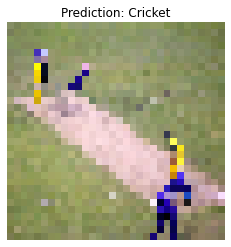

In [21]:
pred_and_plot(model,'Muralitharan_bowling_to_Adam_Gilchrist.jpg',class_names)